In [81]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings;warnings.filterwarnings(action='once')
import pandas_datareader.data as web
import datetime
from datetime import date
large = 22; med = 16; small = 12

params = {
    'axes.titlesize':large,
    'legend.fontsize':med,
    'figure.figsize':(16,9),
    'axes.labelsize':med,
    'axes.titlesize':med,
    'xtick.labelsize':med,
    'ytick.labelsize':med,
    'figure.titlesize':large
}
#We can tell Matplotlib to automatically make room for elements in the figures that we create
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style('white')

E:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 区间量化(分箱)

In [ ]:
"""
任务是使用协同过滤方法预测某用户给某商家的打分。
点评数量与高评分之间有很强的相关性。

现在的问题：应该使用原始点评数量，还是应该对其做进一步的处理？
"""

Text(0, 0.5, 'Occurrenc')

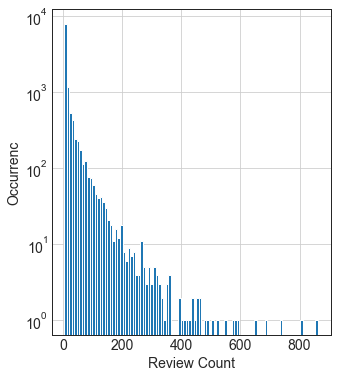

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax = plt.subplots(figsize=(5,6))
sns.set_style("whitegrid")
biz_df["review_count"].hist(ax=ax,bins=100)
ax.set_yscale("log")
ax.tick_params(labelsize=14)
ax.set_xlabel("Review Count",fontsize=14)
ax.set_ylabel("Occurrenc",fontsize=14)

In [ ]:
信息 = """
原始点评数量绝大多数分布在较小的点评数量，但存在有极大点评数量。也就是说此数据集
横跨多个数量级。那么用协同过滤的模型，就需要对数据进行处理。
因为使用欧式距离作为相似的函数来测量数据点之间的相似度，如果数据向量某个元素中过大的
计数值对相似度的影响会远超其他元素，从而破坏整体的相似度测量。
"""

In [ ]:
#通过固定宽度分箱对计数值进行区间量化
import numpy as np



KeyError: 'log_review_count'

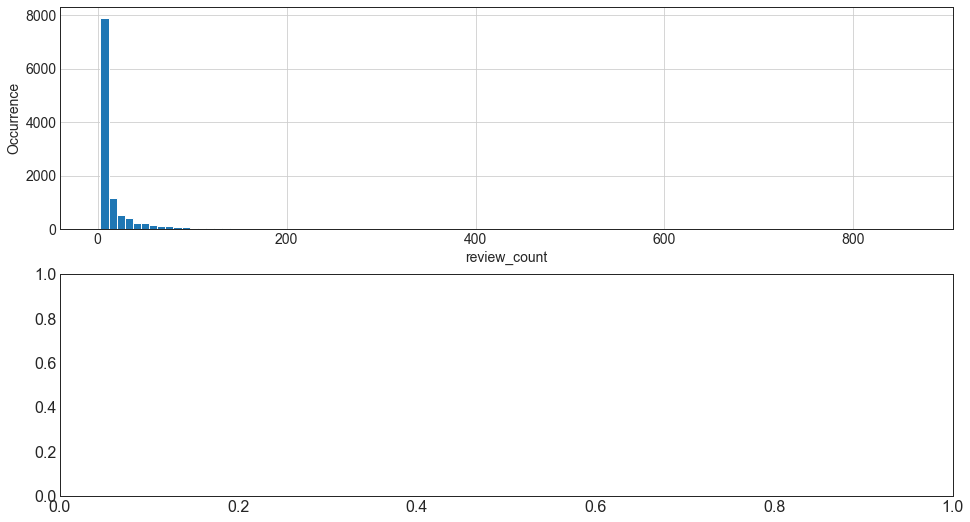

In [30]:
#对数变换前后得点评数量分布可视化
import json
biz_file = open(r"E:\MyMySql\feature\data\yelp_academic_dataset_business.json",mode="r",encoding="utf-8")
biz_df = pd.DataFrame([json.loads(x) for x in biz_file.readlines()])
biz_file.close()
fig,(ax1,ax2) = plt.subplots(2,1)
biz_df["review_count"].hist(ax=ax1,bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel("review_count",fontsize=14)
ax1.set_ylabel("Occurrence",fontsize=14)

biz_df['log_review_count'].hist(ax=ax2,bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('log10((review_count))',fontsize=14)
ax2.set_ylabel("Occurrence",fontsize=14)

In [32]:
biz_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11537 entries, 0 to 11536
Data columns (total 13 columns):
business_id      11537 non-null object
full_address     11537 non-null object
open             11537 non-null bool
categories       11537 non-null object
city             11537 non-null object
review_count     11537 non-null int64
name             11537 non-null object
neighborhoods    11537 non-null object
longitude        11537 non-null float64
state            11537 non-null object
stars            11537 non-null float64
latitude         11537 non-null float64
type             11537 non-null object
dtypes: bool(1), float64(3), int64(1), object(8)
memory usage: 1.1+ MB


In [36]:
labels = ["A","A","B","B"]
distances = [10,20,30,40]
dis = np.array(distances).argsort()
labels[dis[1]]

'A'

# 特征缩放/归一化

In [117]:
import pandas as pd
import sklearn.preprocessing as preproc

#加载在线新闻流行度数据集

#df.info()
#df.columns

df = pd.read_csv(r"E:\MyMySql\feature\data\OnlineNewsPopularity.csv",delimiter=",")
#df.columns
df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [56]:
#查看原始数据---文章中的单词数量
import numpy as np
np.mat(df.iloc[:,3].values)

matrix([[219., 255., 211., ..., 442., 682., 157.]])

In [86]:
#min-max缩放
df["minmax"] = preproc.minmax_scale(df.iloc[:,3])
df["minmax"]

0        0.025844
1        0.030092
2        0.024900
3        0.062662
4        0.126505
           ...   
39639    0.040831
39640    0.038707
39641    0.052160
39642    0.080481
39643    0.018527
Name: minmax, Length: 39644, dtype: float64

In [88]:
#标准化---注意根据标准化的定义，有些结果会是负的
try:
   df["standardized"] = preproc.StandardScaler().fit_transform(np.array(df.iloc[:,3]).reshape(-1,1))
   print(df["standardized"].head())
except Exception as e:
    print(str(e))

0   -0.695210
1   -0.618794
2   -0.712192
3   -0.032933
4    1.115439
Name: standardized, dtype: float64


In [80]:
#l2-归一化
#using array.reshape(-1, 1) if your data has a single feature
df["l2-normalized"] = preproc.normalize(df.iloc[:,3].values.reshape(-1,1),axis=0)
df["l2-normalized"]

0        0.001524
1        0.001775
2        0.001469
3        0.003696
4        0.007462
           ...   
39639    0.002408
39640    0.002283
39641    0.003077
39642    0.004747
39643    0.001093
Name: l2-normalized, Length: 39644, dtype: float64

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 64 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

Text(114.25, 0.5, 'Number of articles')

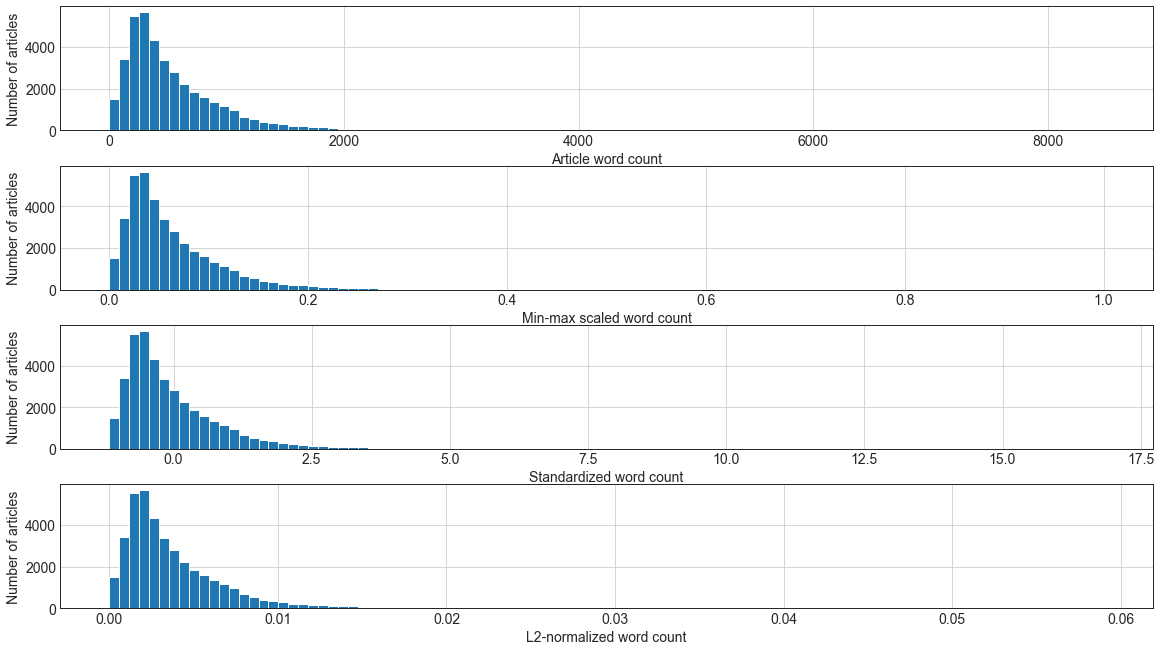

In [90]:
#与对数变换不同，特征缩放不改变分布的形状，只有数据尺度发生了变化
fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,1)
fig.tight_layout()

df.iloc[:,3].hist(ax=ax1,bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel("Article word count",fontsize=14)
ax1.set_ylabel("Number of articles",fontsize=14)

df.iloc[:,62].hist(ax=ax2,bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel("Min-max scaled word count",fontsize=14)
ax2.set_ylabel("Number of articles",fontsize=14)

df.iloc[:,63].hist(ax=ax3,bins=100)
ax3.tick_params(labelsize=14)
ax3.set_xlabel("Standardized word count",fontsize=14)
ax3.set_ylabel("Number of articles",fontsize=14)

df.iloc[:,61].hist(ax=ax4, bins=100)
ax4.tick_params(labelsize=14)
ax4.set_xlabel('L2-normalized word count', fontsize=14)
ax4.set_ylabel('Number of articles', fontsize=14)

In [93]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preproc

df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

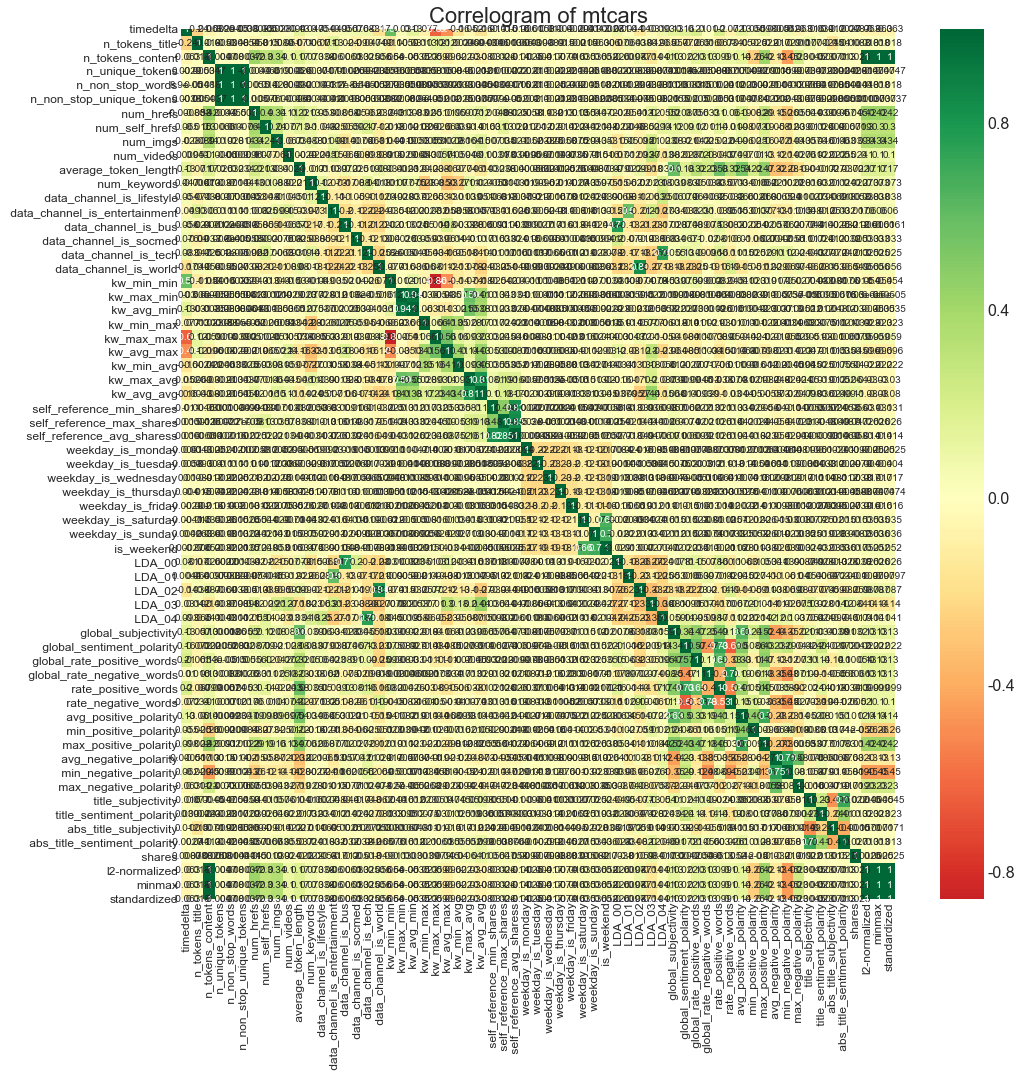

In [102]:
#相关图用于直观地查看给定数据框（或二维数组）中所有可能的数值变量对之间的相关度量。
#plot
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(),xticklabels=df.corr().columns,yticklabels=df.corr().columns,cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#热图显然不适用

In [118]:
features = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus','data_channel_is_socmed', 'data_channel_is_tech','data_channel_is_world']

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [131]:
dict = {"n_tokens_title":df.iloc[:,2],"n_tokens_content":df.iloc[:,3]}
X = pd.DataFrame(dict)

,n_tokens_title,n_tokens_content
0,12.0,219.0
1,9.0,255.0
2,9.0,211.0
3,9.0,531.0
4,13.0,1072.0
...,...,...
39639,11.0,346.0
39640,12.0,328.0
39641,10.0,442.0
39642,6.0,682.0


# 文本数据：扁平化、过滤和分块

In [3]:
import pandas as pd
import json
from sklearn.feature_extraction.text import CountVectorizer

f = open(r"E:\MyMySql\feature\data\yelp_academic_dataset_review.json",encoding="utf-8")
js = []

for i in range(1000):
    js.append(json.loads(f.readline()))
    #f.readline() reads a single line from the file
    #json.loads()#返回一个json格式的数据
f.close()

review_df = pd.DataFrame(js)
review_df

E:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
E:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
E:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


,votes,user_id,review_id,stars,date,text,type,business_id
0,"{'funny': 0, 'useful': 5, 'cool': 2}",rLtl8ZkDX5vH5nAx9C3q5Q,fWKvX83p0-ka4JS3dc6E5A,5,2011-01-26,My wife took me here on my birthday for breakf...,review,9yKzy9PApeiPPOUJEtnvkg
1,"{'funny': 0, 'useful': 0, 'cool': 0}",0a2KyEL0d3Yb1V6aivbIuQ,IjZ33sJrzXqU-0X6U8NwyA,5,2011-07-27,I have no idea why some people give bad review...,review,ZRJwVLyzEJq1VAihDhYiow
2,"{'funny': 0, 'useful': 1, 'cool': 0}",0hT2KtfLiobPvh6cDC8JQg,IESLBzqUCLdSzSqm0eCSxQ,4,2012-06-14,love the gyro plate. Rice is so good and I als...,review,6oRAC4uyJCsJl1X0WZpVSA
3,"{'funny': 0, 'useful': 2, 'cool': 1}",uZetl9T0NcROGOyFfughhg,G-WvGaISbqqaMHlNnByodA,5,2010-05-27,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,_1QQZuf4zZOyFCvXc0o6Vg
4,"{'funny': 0, 'useful': 0, 'cool': 0}",vYmM4KTsC8ZfQBg-j5MWkw,1uJFq2r5QfJG_6ExMRCaGw,5,2012-01-05,General Manager Scott Petello is a good egg!!!...,review,6ozycU1RpktNG2-1BroVtw
...,...,...,...,...,...,...,...,...
995,"{'funny': 0, 'useful': 1, 'cool': 0}",mCE9nD2NnYrokWMMMDoEdw,MNjiCQavIbMZpuBGSbGp9Q,1,2012-04-27,Not worth the money. Food was average and the ...,review,-PA_1J9JzxLcluTOw2gZjw
996,"{'funny': 0, 'useful': 1, 'cool': 0}",dQO0tQISZyb9L4d5ASnXyQ,eYtmkXM7xLwb0w-OpAqIIQ,5,2008-09-21,I love me some Dobson Ranch. As far as munici...,review,bRk44ShCT0osos-1xaTRyA
997,"{'funny': 0, 'useful': 0, 'cool': 0}",GAW_mbLDbIoZQ0V0ZhWK8Q,KpnYRPGPVAAh3tl8NUuGHg,2,2007-11-27,I don't know why i have been here more than on...,review,roTWGaU-RcJ06l8cjFw7xQ
998,"{'funny': 0, 'useful': 0, 'cool': 1}",9FbgqZ5u9WTLAs28nNafIQ,pehsPum9iW6DVyWil6WhFQ,5,2007-08-13,Mouth watering. That's all I have to say.\n\nT...,review,V2isTBBfO0NgLzXO9oq1Mg


In [4]:
bow_converter = CountVectorizer(token_pattern="(?u)\\b\\w+\\b")#(?u)\b\w+\b"
#多的\是因为显示出来的字符串是用r的模式解读出来，自动带了转义，故解读"(?u)\b\w+\b"此正则表达式即可
#首先"(?u)"放在前面表：匹配中对大小写不敏感，
#然后紧接着的"\b"和末尾的"\b"表示匹配两个词语的间隔
#中间的"\w+"表示匹配一个或者多个字母或数字或下划线或汉字
#所以这个会匹配一个词语
bow_converter.fit(review_df["text"])#拟合转换器，查看词汇表大小
words = bow_converter.get_feature_names()
words[0:9]

['0', '00', '000', '00pm', '02', '05', '07', '1', '10']

In [5]:
#二元词
bigram_converter = CountVectorizer(ngram_range=(2,2),
                                  token_pattern="(?u)\\b\\w+\\b")
bigram_converter.fit(review_df["text"])
bigrams = bigram_converter.get_feature_names()
bigrams[:10]

['0 inch',
 '0 ph',
 '0 that',
 '00 am',
 '00 and',
 '00 but',
 '00 everyday',
 '00 for',
 '00 had',
 '00 i']

In [6]:
trigram_converter  =CountVectorizer(ngram_range=(3,3),
                                   token_pattern="(?u)\\b\\w+\\b")
trigram_converter.fit(review_df["text"])
trigrams = trigram_converter.get_feature_names()
print(type(trigrams))
trigrams[0:9]



<class 'list'>


['0 inch sub',
 '0 ph version',
 '0 that s',
 '00 am before',
 '00 am like',
 '00 am or',
 '00 and that',
 '00 and the',
 '00 but i']

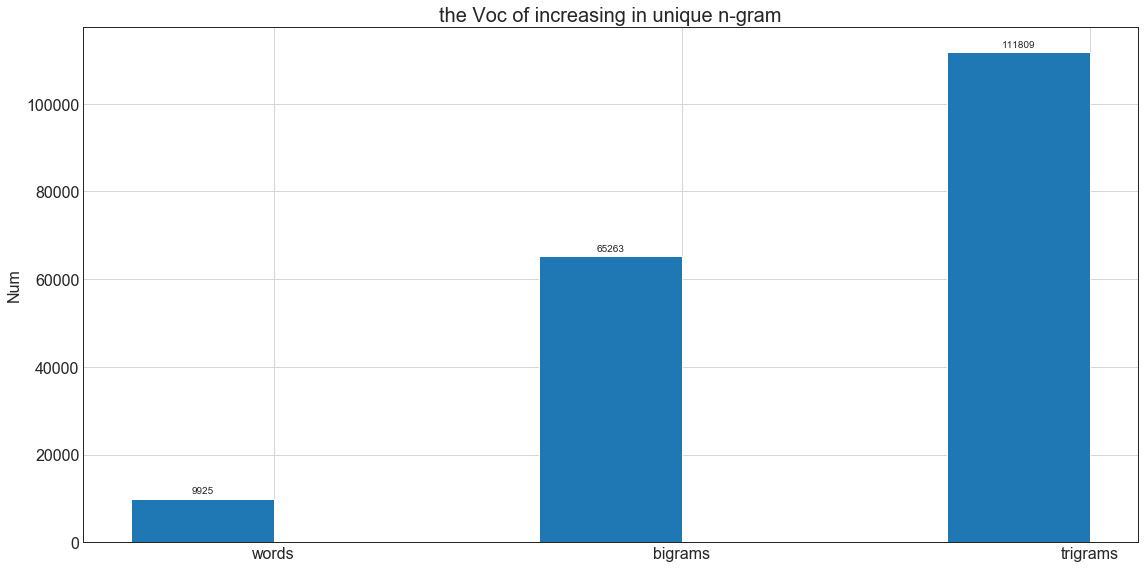

In [7]:
w = 0
for i in words:
    w+=1
b = 0
for i in bigrams:
    b+=1
t = 0
for i in trigrams:
    t+=1
x = 0
label_s = ["words","bigrams","trigrams"]
for i in label_s:
    x+=1

len_1 = [w,b,t]

x = np.arange(x)#the label locations
width = 0.35 # the width of the bars

fig,ax = plt.subplots(figsize=(16,8))
rects1 = ax.bar(x-width/2,len_1,width)

#Add some text for labels ,title and custom x-axis tick labels,etc.
ax.set_ylabel("Num")
ax.set_title("the Voc of increasing in unique n-gram",fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(label_s)

def autolabel(rects1):
    """
    Attach a text label above each bar in "rects",displaying its height.
    """
    for rect in rects1:
        height = rect.get_height()
        ax.annotate("{}".format(height),
                   xy=(rect.get_x()+rect.get_width()/2,height),
                   xytext=(0,3),#3 points vertical offset
                   textcoords="offset points",
                    ha="center",va="bottom"
                   )
autolabel(rects1)

fig.tight_layout()
plt.grid(True)
plt.show()

In [8]:
import nltk

stemmer = nltk.stem.porter.PorterStemmer()
stemmer.stem("flowers")
print(stemmer.stem("zeroes"),stemmer.stem("stemmer"),stemmer.stem("sixties"),
     stemmer.stem("sixty"),stemmer.stem("goes"),stemmer.stem("go"))

E:\Anaconda\lib\site-packages\nltk\decorators.py:68: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  regargs, varargs, varkwargs, defaults, formatvalue=lambda value: ""
E:\Anaconda\lib\site-packages\nltk\lm\counter.py:15: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence, defaultdict
E:\Anaconda\lib\site-packages\nltk\lm\vocabulary.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Counter, Iterable
E:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


zero stemmer sixti sixti goe go


In [53]:
#词性标注和文本块
import pandas as pd
import json

f = open(r"E:\MyMySql\feature\data\yelp_academic_dataset_review.json")
js = []
for i in range(10):
    js.append(json.loads(f.readline()))
f.close()
review_df = pd.DataFrame(js)
review_df

,votes,user_id,review_id,stars,date,text,type,business_id
0,"{'funny': 0, 'useful': 5, 'cool': 2}",rLtl8ZkDX5vH5nAx9C3q5Q,fWKvX83p0-ka4JS3dc6E5A,5,2011-01-26,My wife took me here on my birthday for breakf...,review,9yKzy9PApeiPPOUJEtnvkg
1,"{'funny': 0, 'useful': 0, 'cool': 0}",0a2KyEL0d3Yb1V6aivbIuQ,IjZ33sJrzXqU-0X6U8NwyA,5,2011-07-27,I have no idea why some people give bad review...,review,ZRJwVLyzEJq1VAihDhYiow
2,"{'funny': 0, 'useful': 1, 'cool': 0}",0hT2KtfLiobPvh6cDC8JQg,IESLBzqUCLdSzSqm0eCSxQ,4,2012-06-14,love the gyro plate. Rice is so good and I als...,review,6oRAC4uyJCsJl1X0WZpVSA
3,"{'funny': 0, 'useful': 2, 'cool': 1}",uZetl9T0NcROGOyFfughhg,G-WvGaISbqqaMHlNnByodA,5,2010-05-27,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,_1QQZuf4zZOyFCvXc0o6Vg
4,"{'funny': 0, 'useful': 0, 'cool': 0}",vYmM4KTsC8ZfQBg-j5MWkw,1uJFq2r5QfJG_6ExMRCaGw,5,2012-01-05,General Manager Scott Petello is a good egg!!!...,review,6ozycU1RpktNG2-1BroVtw
5,"{'funny': 1, 'useful': 3, 'cool': 4}",sqYN3lNgvPbPCTRsMFu27g,m2CKSsepBCoRYWxiRUsxAg,4,2007-12-13,"Quiessence is, simply put, beautiful. Full wi...",review,-yxfBYGB6SEqszmxJxd97A
6,"{'funny': 4, 'useful': 7, 'cool': 7}",wFweIWhv2fREZV_dYkz_1g,riFQ3vxNpP4rWLk_CSri2A,5,2010-02-12,Drop what you're doing and drive here. After I...,review,zp713qNhx8d9KCJJnrw1xA
7,"{'funny': 0, 'useful': 1, 'cool': 0}",1ieuYcKS7zeAv_U15AB13A,JL7GXJ9u4YMx7Rzs05NfiQ,4,2012-07-12,"Luckily, I didn't have to travel far to make m...",review,hW0Ne_HTHEAgGF1rAdmR-g
8,"{'funny': 0, 'useful': 0, 'cool': 0}",Vh_DlizgGhSqQh4qfZ2h6A,XtnfnYmnJYi71yIuGsXIUA,4,2012-08-17,Definitely come for Happy hour! Prices are ama...,review,wNUea3IXZWD63bbOQaOH-g
9,"{'funny': 0, 'useful': 1, 'cool': 0}",sUNkXg8-KFtCMQDV6zRzQg,jJAIXA46pU1swYyRCdfXtQ,5,2010-08-11,Nobuo shows his unique talents with everything...,review,nMHhuYan8e3cONo3PornJA


In [30]:
#首先使用textblob中的函数
from textblob import TextBlob
import nltk
#nltk.download("punkt")
#nltk.download('averaged_perceptron_tagger')
nltk.download()
#blob_df = review_df["text"].apply(TextBlob)

#blob_df[4].tags

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [44]:
import spacy
import en-core-web-md
nlp = en-core-web-md.load()


OSError: [E050] Can't find model 'en-core-web-md'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [67]:
基本假设="""
自然语言是人类在沟通中形成的一套规则体系。规则有强有弱，比如非正式场合使用口语，正式场合下使用书面语；
文法：等同于语法(grammar),文章的书写规范，用来描述语言及其结构，它包含句法和词法规范
句法：Syntax，句子的结构或成分的构成与关系的规范
词法：Lexical，词的构成、变化等的规范
"""

import nltk
from nltk.tokenize import PunktSentenceTokenizer
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk import RegexpParser
from nltk.corpus import brown

#基于规则词性标注
pattern = [
    (r'.*ing$','VBG'),
    (r'.*ed$','VBD'),
    (r'.*es$','VBZ'),
    (r'.*\'s$','NN$'),
    (r'.*s$','NNS'),
    (r'.*', 'NN')  
]
for i in train_text:
        tagger = nltk.RegexpTagger(pattern)
        print(tagger.tag(nltk.word_tokenize(i)))

tagged_sents = brown.tagged_sents(categories="text")
print(default_tagger.evaluate(tagged_sents))


[('My', 'NN'), ('wife', 'NN'), ('took', 'NN'), ('me', 'NN'), ('here', 'NN'), ('on', 'NN'), ('my', 'NN'), ('birthday', 'NN'), ('for', 'NN'), ('breakfast', 'NN'), ('and', 'NN'), ('it', 'NN'), ('was', 'NNS'), ('excellent', 'NN'), ('.', 'NN'), ('The', 'NN'), ('weather', 'NN'), ('was', 'NNS'), ('perfect', 'NN'), ('which', 'NN'), ('made', 'NN'), ('sitting', 'VBG'), ('outside', 'NN'), ('overlooking', 'VBG'), ('their', 'NN'), ('grounds', 'NNS'), ('an', 'NN'), ('absolute', 'NN'), ('pleasure', 'NN'), ('.', 'NN'), ('Our', 'NN'), ('waitress', 'NNS'), ('was', 'NNS'), ('excellent', 'NN'), ('and', 'NN'), ('our', 'NN'), ('food', 'NN'), ('arrived', 'VBD'), ('quickly', 'NN'), ('on', 'NN'), ('the', 'NN'), ('semi-busy', 'NN'), ('Saturday', 'NN'), ('morning', 'VBG'), ('.', 'NN'), ('It', 'NN'), ('looked', 'VBD'), ('like', 'NN'), ('the', 'NN'), ('place', 'NN'), ('fills', 'NNS'), ('up', 'NN'), ('pretty', 'NN'), ('quickly', 'NN'), ('so', 'NN'), ('the', 'NN'), ('earlier', 'NN'), ('you', 'NN'), ('get', 'NN'), ('

LookupError: 
**********************************************************************
  Resource [93mbrown[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('brown')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/brown[0m

  Searched in:
    - 'C:\\Users\\23909/nltk_data'
    - 'E:\\Anaconda\\nltk_data'
    - 'E:\\Anaconda\\share\\nltk_data'
    - 'E:\\Anaconda\\lib\\nltk_data'
    - 'C:\\Users\\23909\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:
url = "https://www.nltk.org/data.html"

In [9]:
#ti-idf方法测试
import json 
import pandas as pd

#加载Yelp商家数据
biz_f = open(r"E:\MyMySql\feature\data\yelp_academic_dataset_business.json")
biz_df = pd.DataFrame([json.loads(x) for x in biz_f.readlines()])
biz_f.close()


In [10]:
#加载Yelp点评数据
review_file = open(r"E:\MyMySql\feature\data\yelp_academic_dataset_review.json")
review_df = pd.DataFrame([json.loads(x) for x in review_file.readlines()])
review_file.close()

In [11]:
#选出夜店和餐馆，与点评数据连接，得到两种类型商家的所有点评
biz_df.info()
biz_df["categories"].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11537 entries, 0 to 11536
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   business_id    11537 non-null  object 
 1   full_address   11537 non-null  object 
 2   open           11537 non-null  bool   
 3   categories     11537 non-null  object 
 4   city           11537 non-null  object 
 5   review_count   11537 non-null  int64  
 6   name           11537 non-null  object 
 7   neighborhoods  11537 non-null  object 
 8   longitude      11537 non-null  float64
 9   state          11537 non-null  object 
 10  stars          11537 non-null  float64
 11  latitude       11537 non-null  float64
 12  type           11537 non-null  object 
dtypes: bool(1), float64(3), int64(1), object(8)
memory usage: 1.1+ MB


0    [Accountants, Professional Services, Tax Servi...
1                    [Sporting Goods, Bikes, Shopping]
2                                                   []
3                                      [Food, Grocery]
4                   [Food, Bagels, Delis, Restaurants]
Name: categories, dtype: object

In [12]:
#cate = biz_df["categories"].loc[lambda cate :"Restaurants" in cate]

KeyError: False

In [13]:
biz_df.apply(lambda x:"Restaurants" in x["categories"] or "Nightlife" in x["categories"],axis=1)

0        False
1        False
2        False
3        False
4         True
         ...  
11532     True
11533     True
11534    False
11535     True
11536    False
Length: 11537, dtype: bool

In [14]:
two_biz = biz_df[biz_df.apply(lambda x: 'Nightlife' in x['categories'] or'Restaurants' in x['categories'], axis=1)]

In [15]:
two_biz=biz_df[biz_df.apply(lambda x: 'Nightlife' in x['categories'] or'Restaurants' in x['categories'], axis=1)]

In [16]:
twobiz_reviews = two_biz.merge(review_df,on="business_id",how="inner")
twobiz_reviews = twobiz_reviews[["business_id","name","stars_y","text","categories"]]#索引的第一种方式
twobiz_reviews

,business_id,name,stars_y,text,categories
0,PzOqRohWw7F7YEPBz6AubA,Hot Bagels & Deli,4,FINALLY a decent place for breakfast and lunch...,"[Food, Bagels, Delis, Restaurants]"
1,PzOqRohWw7F7YEPBz6AubA,Hot Bagels & Deli,4,Stopped in to grab a couple coffees and a bage...,"[Food, Bagels, Delis, Restaurants]"
2,PzOqRohWw7F7YEPBz6AubA,Hot Bagels & Deli,5,Absolutely love this place. The bagels are ma...,"[Food, Bagels, Delis, Restaurants]"
3,PzOqRohWw7F7YEPBz6AubA,Hot Bagels & Deli,5,"You can not go wrong with this place, any bage...","[Food, Bagels, Delis, Restaurants]"
4,PzOqRohWw7F7YEPBz6AubA,Hot Bagels & Deli,5,Love this place! I'm so glad they opened up i...,"[Food, Bagels, Delis, Restaurants]"
...,...,...,...,...,...
166033,tQTqlMW0sODNbe188ah1Yg,Gyros Palace,3,Excellent food. a little slow but fun place to...,"[Greek, Mediterranean, Restaurants]"
166034,tQTqlMW0sODNbe188ah1Yg,Gyros Palace,2,Lunch time and Gyros Place was across the road...,"[Greek, Mediterranean, Restaurants]"
166035,tQTqlMW0sODNbe188ah1Yg,Gyros Palace,4,Ever met anyone who has never tried a gyro? An...,"[Greek, Mediterranean, Restaurants]"
166036,tQTqlMW0sODNbe188ah1Yg,Gyros Palace,5,Easily the Best Gyros in Arizona. The Tzatziki...,"[Greek, Mediterranean, Restaurants]"


In [17]:
#创建目标列
twobiz_reviews["target"] = twobiz_reviews.apply(\
        lambda x:"Nightlife" in x["categories"],
                                                axis=1)
twobiz_reviews

,business_id,name,stars_y,text,categories,target
0,PzOqRohWw7F7YEPBz6AubA,Hot Bagels & Deli,4,FINALLY a decent place for breakfast and lunch...,"[Food, Bagels, Delis, Restaurants]",False
1,PzOqRohWw7F7YEPBz6AubA,Hot Bagels & Deli,4,Stopped in to grab a couple coffees and a bage...,"[Food, Bagels, Delis, Restaurants]",False
2,PzOqRohWw7F7YEPBz6AubA,Hot Bagels & Deli,5,Absolutely love this place. The bagels are ma...,"[Food, Bagels, Delis, Restaurants]",False
3,PzOqRohWw7F7YEPBz6AubA,Hot Bagels & Deli,5,"You can not go wrong with this place, any bage...","[Food, Bagels, Delis, Restaurants]",False
4,PzOqRohWw7F7YEPBz6AubA,Hot Bagels & Deli,5,Love this place! I'm so glad they opened up i...,"[Food, Bagels, Delis, Restaurants]",False
...,...,...,...,...,...,...
166033,tQTqlMW0sODNbe188ah1Yg,Gyros Palace,3,Excellent food. a little slow but fun place to...,"[Greek, Mediterranean, Restaurants]",False
166034,tQTqlMW0sODNbe188ah1Yg,Gyros Palace,2,Lunch time and Gyros Place was across the road...,"[Greek, Mediterranean, Restaurants]",False
166035,tQTqlMW0sODNbe188ah1Yg,Gyros Palace,4,Ever met anyone who has never tried a gyro? An...,"[Greek, Mediterranean, Restaurants]",False
166036,tQTqlMW0sODNbe188ah1Yg,Gyros Palace,5,Easily the Best Gyros in Arizona. The Tzatziki...,"[Greek, Mediterranean, Restaurants]",False


In [18]:
twobiz_reviews["target"].sum()
#能否通过点评数据区分出一个商家是餐馆还是夜店
#类别不平衡：点评数量相差很大
#解决方法对优势类别进行下采样，使它的数量与劣势类别基本相当


#创建一个类别平衡的子样本
nightlife = twobiz_reviews[twobiz_reviews.apply(
                lambda x:"Nightlife" in x["categories"],axis=1)]
restaurants = twobiz_reviews[twobiz_reviews.apply(
                lambda x:"Restaurants" in x["categories"],axis=1)]

nightlife_subset = nightlife.sample(frac=0.1,random_state=123)

In [19]:
restaurant_subset = restaurants.sample(frac=0.021,random_state=123)

In [20]:
combined = pd.concat([nightlife_subset,restaurant_subset])#纯粹地将表进行堆积
combined.sample(10)

,business_id,name,stars_y,text,categories,target
49448,kPh2gPvd8moVx6gNf2iHsA,Taberna del Tequila,2,I usually don't even bother reviewing airport ...,"[Bars, American (Traditional), Mexican, Nightl...",True
126644,JZJqJadk9pSoCGT7VTwBvg,Rhythm Room,4,Deep in the heart of downtown Phoenix lies a t...,"[Bars, Arts & Entertainment, Nightlife, Music ...",True
100181,VKNl2-aF4n1x7lPVyU-Mag,Spotted Donkey Cantina,4,a disclaimer: i am familiar neither with the A...,"[Nightlife, Bars, Mexican, Tex-Mex, Restaurants]",True
164237,L_MtTn4IUBTmQtqqM2iFqA,Tea Lite Cafe,4,There are only 3 words you need to say at this...,"[Vietnamese, Restaurants]",False
164696,e3izESeW0BUx0s96FdSLag,Va Bene,4,Wed nite found the place mostly empty. Drinks...,"[Wine Bars, Bars, Restaurants, Nightlife, Ital...",True
106697,7LGjM8HKJTwqfYU3C7N_0w,Rico's American Grill,4,I'm an admirer of the Pointe Hilton Squaw Peak...,"[American (New), Restaurants]",False
23853,xqO1fp2zuxeeYjPeGP2Eaw,Brad's Place,5,Brad's Place is the kind of great little neigh...,"[Bars, Sports Bars, Nightlife]",True
83964,OFBJtqWGSx6n6CchtVmoRw,Delux,5,OH I have a craving and its Delux...in fact th...,"[Burgers, Bars, Nightlife, Restaurants]",True
142264,5uRaUf0eNyJgIdwAkIOM7Q,75th Thai Taste Restaurant,4,We've been going here a few times and were cra...,"[Thai, Restaurants]",False
79254,NRdF06RW3QNTUBWdJT936w,Shangri-La De Old Cathay,2,"Used to come here semi-regularly, but hadn't b...","[Nightlife, Chinese, Restaurants]",True


In [21]:
#划分训练集和测试集
from sklearn.model_selection import train_test_split
training_data,test_data = train_test_split(combined,
                                                    train_size=0.7,
                                                 random_state=123)


In [22]:
#转换特征
#用词袋表示点评文本
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_tr_bow = vectorizer.fit_transform(training_data["text"])
X_te_bow = vectorizer.transform(test_data["text"])
len(vectorizer.vocabulary_)

18565

In [23]:
y_tr = training_data["target"]
y_te = test_data["target"]

In [24]:
#词袋矩阵
print(X_tr_bow.toarray())
print(vectorizer.get_feature_names())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['00', '000', '00am', '00pm', '01', '02', '05', '06', '07', '08', '09', '10', '100', '1000', '100ft', '100th', '101', '1015', '101n', '104', '106', '109', '10am', '10hrs', '10ish', '10lbs', '10min', '10oz', '10p', '10pm', '10ppl', '11', '110', '1130', '115', '119', '11am', '11ish', '11pm', '11st', '11th', '12', '120', '12am', '12oz', '12th', '13', '130', '133', '13th', '14', '140', '14oz', '14th', '15', '150', '1500', '150lbs', '151', '1547736', '155', '1554', '15lbs', '15min', '15pm', '15th', '16', '160', '1641pje2bhjbwtd1t6z2pa', '165', '1664', '16oz', '16pm', '16th', '17', '170', '17th', '18', '180', '1800', '1800s', '1863', '18k', '19', '1911', '1918', '1928', '1940', '1949', '1950', '1950s', '1957', '1960', '1967', '1970s', '1973', '1976', '1978', '1980', '1981', '1984', '1990s', '1992', '1994', '1995', '1996', '1999', '19th', '1am', '1hr', '1mvw7ownmtfiwstuidqou

In [26]:
#使用词袋矩阵创建tf-idf表示
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import StandardScaler
tfidf_trfm = TfidfTransformer(norm=None)
X_tr_tfidf = tfidf_trfm.fit_transform(X_tr_bow)
X_te_tfidf = tfidf_trfm.transform(X_te_bow)

#仅出于练习的目的，对词袋表示进行l2归一化
#scaler = StandardScaler()
#scaler.fit(X_tr_bow)
#X_tr_12 = scaler.transform(X_tr_bow)
#X_tr_12
#X_tr_12 = scaler.transform()
#X_tr_l2 = preproc.normalize(X_tr_bow,axis=0)
#X_te_l2 = preproc.normalize(X_te_bow,axis=0)

NameError: name 'preproc' is not defined

In [32]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(X_tr_tfidf)
normalized_X = scaler.transform(X_tr_tfidf)
normalized_X_test = scaler.transform(X_te_tfidf)

In [30]:
from sklearn.linear_model import LogisticRegression

def simple_logistic_classify(normalized_X,y_tr,normalized_X_test,y_test,description):
    """
    辅助函数，用来训练逻辑回归分类器，并在测试数据上进行评分
    """
    m = LogisticRegression().fit(normalized_X,y_tr)
    s = m.score(normalized_X_test,y_te)
    print("Test score woth",description,"feature:",s)
    return m


In [41]:
m1 = simple_logistic_classify(normalized_X,y_tr,normalized_X_test,y_te,"normalized")
m2 = simple_logistic_classify(X_tr_bow,y_tr,X_te_bow,y_te,"bow")
m3 = simple_logistic_classify(X_tr_tfidf,y_tr,X_te_tfidf,y_te,"tfidf")

Test score woth normalized feature: 0.791907514450867
Test score woth bow feature: 0.767209668943773
Test score woth tfidf feature: 0.7545980031529165


In [43]:
#使用正则化对逻辑回归进行调优
import sklearn.model_selection as modsel

#确定一个搜索网格，然后对每种特征集合执行5-折网格搜索
param_grid_ = {
    "C":[1e-5, 1e-3, 1e-1, 1e0, 1e1, 1e2]
}

#为词袋表示法进行分类器调优
bow_search = modsel.GridSearchCV(LogisticRegression(),cv=5,
                                param_grid=param_grid_)

bow_search.fit(X_tr_bow,y_tr)

#为normlsize归一化词向量进行分类器调优
l2_search = modsel.GridSearchCV(LogisticRegression(),cv=5,
                               param_grid=param_grid_)
l2_search.fit(normalized_X,y_tr)

#tf-idf进行分类器调优
tfidf_search = modsel.GridSearchCV(LogisticRegression(),cv=5,
                                  param_grid=param_grid_)
tfidf_search.fit(X_tr_tfidf,y_tr)


tfidf = tfidf_search.cv_results_
tfidf_max = tfidf.get("mean_test_score").max()#取最大值

l2 = l2_search.cv_results_
l2_max = l2.get("mean_test_score").max()#取最大值

bow = bow_search.cv_results_
bow_max = bow.get("mean_test_score").max()#取最大值

print(
"Test score with bow features:",bow_max,"\n",
"Test score with 12-normalized features:",l2_max,"\n",
"Test score with tf-idf features:",tfidf_max
)

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1e-05, 0.001, 0.1, 1.0, 10.0, 100.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [44]:
#为normlsize归一化词向量进行分类器调优
l2_search = modsel.GridSearchCV(LogisticRegression(),cv=5,
                               param_grid=param_grid_)
l2_search.fit(normalized_X,y_tr)

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1e-05, 0.001, 0.1, 1.0, 10.0, 100.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [45]:
#tf-idf进行分类器调优
tfidf_search = modsel.GridSearchCV(LogisticRegression(),cv=5,
                                  param_grid=param_grid_)
tfidf_search.fit(X_tr_tfidf,y_tr)

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1e-05, 0.001, 0.1, 1.0, 10.0, 100.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [46]:
#检查网格搜索的一个输出，看看它们是如何运行的
bow_search.cv_results_

{'mean_fit_time': array([0.03570638, 0.05485835, 0.21522593, 0.37150855, 0.62764874,
        0.69813371]),
 'std_fit_time': array([0.0078374 , 0.00705876, 0.0310643 , 0.05593456, 0.12126583,
        0.06100235]),
 'mean_score_time': array([0.00199308, 0.0009933 , 0.00099697, 0.00079904, 0.00119338,
        0.0009974 ]),
 'std_score_time': array([1.26316245e-03, 7.13568924e-06, 1.74941409e-06, 3.99520243e-04,
        4.01237165e-04, 6.30752897e-04]),
 'param_C': masked_array(data=[1e-05, 0.001, 0.1, 1.0, 10.0, 100.0],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1e-05},
  {'C': 0.001},
  {'C': 0.1},
  {'C': 1.0},
  {'C': 10.0},
  {'C': 100.0}],
 'split0_test_score': array([0.54842342, 0.76013514, 0.78490991, 0.76576577, 0.75112613,
        0.73423423]),
 'split1_test_score': array([0.55067568, 0.72072072, 0.77702703, 0.76801802, 0.7545045 ,
        0.74887387]),
 'split2_test_score': array([0.5518018

In [47]:
l2_search.cv_results_

{'mean_fit_time': array([0.02073622, 0.0207459 , 0.03929734, 0.07140956, 0.10472121,
        0.14700851]),
 'std_fit_time': array([0.00191921, 0.00116359, 0.00381582, 0.00692665, 0.01205153,
        0.01233589]),
 'mean_score_time': array([0.00099721, 0.00099692, 0.00059857, 0.00139594, 0.00119615,
        0.00059791]),
 'std_score_time': array([4.42200589e-07, 1.23057250e-06, 4.88733375e-04, 4.88714100e-04,
        3.98755369e-04, 4.88188770e-04]),
 'param_C': masked_array(data=[1e-05, 0.001, 0.1, 1.0, 10.0, 100.0],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1e-05},
  {'C': 0.001},
  {'C': 0.1},
  {'C': 1.0},
  {'C': 10.0},
  {'C': 100.0}],
 'split0_test_score': array([0.54842342, 0.54842342, 0.73198198, 0.80518018, 0.79504505,
        0.77477477]),
 'split1_test_score': array([0.54842342, 0.54842342, 0.70608108, 0.78603604, 0.79166667,
        0.78490991]),
 'split2_test_score': array([0.5484234

In [48]:
tfidf_search.cv_results_

{'mean_fit_time': array([0.03690248, 0.06961646, 0.22539897, 0.306388  , 0.4326447 ,
        0.47204113]),
 'std_fit_time': array([0.00560575, 0.01409578, 0.01227946, 0.0249318 , 0.07489278,
        0.03651569]),
 'mean_score_time': array([0.00119638, 0.00059772, 0.00059748, 0.00099721, 0.00119739,
        0.00059853]),
 'std_score_time': array([3.98874440e-04, 4.88032780e-04, 4.87837995e-04, 1.02934995e-06,
        4.01115559e-04, 4.88694643e-04]),
 'param_C': masked_array(data=[1e-05, 0.001, 0.1, 1.0, 10.0, 100.0],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1e-05},
  {'C': 0.001},
  {'C': 0.1},
  {'C': 1.0},
  {'C': 10.0},
  {'C': 100.0}],
 'split0_test_score': array([0.59234234, 0.81306306, 0.76463964, 0.7454955 , 0.73986486,
        0.71283784]),
 'split1_test_score': array([0.58558559, 0.79617117, 0.77252252, 0.76238739, 0.75112613,
        0.71959459]),
 'split2_test_score': array([0.5979729

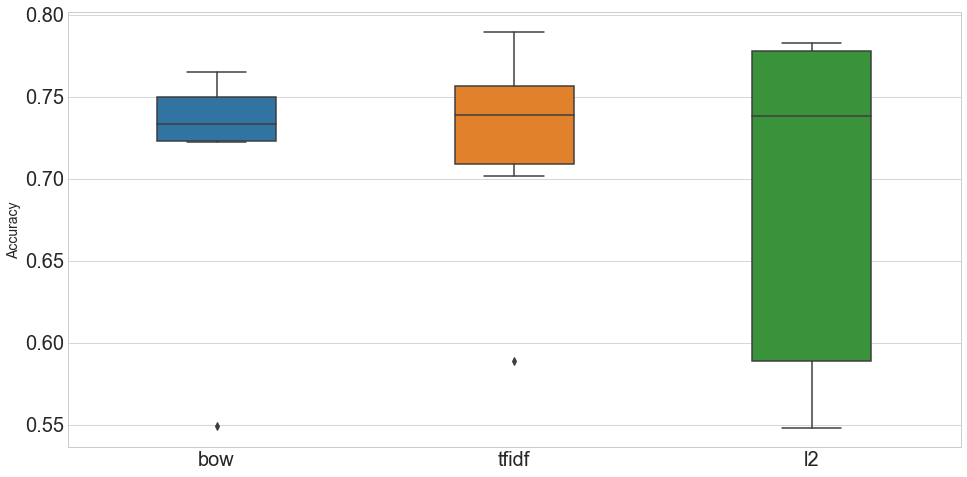

In [53]:
#在箱线图绘制出交叉验证结果
#对分类器性能进行可视化比较
search_results = pd.DataFrame.from_dict({
    "bow":bow_search.cv_results_["mean_test_score"],
    "tfidf":tfidf_search.cv_results_["mean_test_score"],
    "l2":l2_search.cv_results_["mean_test_score"]
})

#seaborn用来美化图形
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
sns.set_style("whitegrid")
ax = sns.boxplot(data=search_results,width=0.4)
ax.set_ylabel("Accuracy",size=14)
ax.tick_params(labelsize=20)


In [76]:
#比较不同特征集合的最终训练与测试步骤
#使用前面找到的特征最优超参数设置，在整个训练集上训练一个最终模型
#在测试集上测量准确度


tfidf = tfidf_search.cv_results_
tfidf_max = tfidf.get("mean_test_score").max()#取最大值

l2 = l2_search.cv_results_
l2_max = l2.get("mean_test_score").max()#取最大值

bow = bow_search.cv_results_
bow_max = bow.get("mean_test_score").max()#取最大值

print(
"Test score with bow features:",bow_max,"\n",
"Test score with 12-normalized features:",l2_max,"\n",
"Test score with tf-idf features:",tfidf_max
)

Test score with bow features: 0.765209553853087 
 Test score with 12-normalized features: 0.7825597115817936 
 Test score with tf-idf features: 0.7893195132942767


In [70]:
import numpy as np

a = np.mat("4 3;2 1")
b = np.mat("1 2;3 4")


print(a,"\n",b)

[[4 3]
 [2 1]] 
 [[1 2]
 [3 4]]


In [1]:
from nltk.tokenize import sent_tokenize,word_tokenize

EXAMPLE_TEXT = """
Hello Mr. Smith, how are you doing today? The weather is great, and Python is awesome. The sky is pinkish-blue. You shouldn't eat cardboard.
"""
sent_split = sent_tokenize(EXAMPLE_TEXT))

['\nHello Mr. Smith, how are you doing today?', 'The weather is great, and Python is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard."]


In [2]:
word_split = word_tokenize(EXAMPLE_TEXT)
word_split

['Hello',
 'Mr.',
 'Smith',
 ',',
 'how',
 'are',
 'you',
 'doing',
 'today',
 '?',
 'The',
 'weather',
 'is',
 'great',
 ',',
 'and',
 'Python',
 'is',
 'awesome',
 '.',
 'The',
 'sky',
 'is',
 'pinkish-blue',
 '.',
 'You',
 'should',
 "n't",
 'eat',
 'cardboard',
 '.']

In [4]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

example_sent = "This is a sample sentence, showing off the stop words filtration."

stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(example_sent)

filtered_sentence = [w for w in word_tokens if not w in stop_words]

filtered_sentence = []

for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

print(word_tokens)
print(filtered_sentence)

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\23909/nltk_data'
    - 'E:\\Anaconda\\nltk_data'
    - 'E:\\Anaconda\\share\\nltk_data'
    - 'E:\\Anaconda\\lib\\nltk_data'
    - 'C:\\Users\\23909\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [7]:
"""词干提取"""
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

example_words = ["python","pythoner","pythoning","pythoned","pythonly"]

for w in example_words:
    print(ps.stem(w))

python
python
python
python
pythonli


In [8]:
"""尝试对一个典型的句子，而不是一些单词提取词干"""
new_text = """
It is important to by very pythonly while you are pythoning with python. All pythoners have pythoned poorly at least once.
"""
words = word_tokenize(new_text)

for w in words:
    print(ps.stem(w))

It
is
import
to
by
veri
pythonli
while
you
are
python
with
python
.
all
python
have
python
poorli
at
least
onc
.


In [12]:
import nltk
#from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer

#床架训练和测试数据
train_text = new_text

#训练Punkt标记器
custom_sent_tokenizer = PunktSentenceTokenizer(train_text)

#实际分词
sample_text = """It was founded in 1949 as a school for the cadres of All-China Women's Federation. The current name was adopted in 1995 and in 1996 it became a university. Currently it has about 160 teachers and 3,300 under…"""
tokenized = custom_sent_tokenizer.tokenize(sample_text)

#接下来我们创建一个函数，来完成这个词性标注脚本，该函数将遍历并标记每个句子的词性

def process_content():
    try:
       for i in tokenized[:5]:
        words = nltk.word_tokenize(i)
        tagged = nltk.pos_tag(words)
        print(tagged)
    except Exception as e:
        print(str(e))
        
process_content()


**********************************************************************
  Resource averaged_perceptron_tagger not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('averaged_perceptron_tagger')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load taggers/averaged_perceptron_tagger/averaged_perceptron_tagger.pickle

  Searched in:
    - 'C:\\Users\\23909/nltk_data'
    - 'E:\\Anaconda\\nltk_data'
    - 'E:\\Anaconda\\share\\nltk_data'
    - 'E:\\Anaconda\\lib\\nltk_data'
    - 'C:\\Users\\23909\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************



In [5]:
biz_f = open("‪C:\Users\23909\qianbidao3\text.txt")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 12-13: truncated \UXXXXXXXX escape (<ipython-input-5-6c694ee5b1c1>, line 1)